In [1]:
#!pip install --quiet --user git+https://github.com/hmmlearn/hmmlearn
from hmmlearn import hmm
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense,BatchNormalization, LeakyReLU, Dense, Reshape, Flatten, Activation
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras import initializers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, multiply, GaussianNoise, MaxPooling2D, concatenate,LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#load Data


df = pd.read_csv('C:\\Users\\SAIL\\stapler-ds (1).csv',parse_dates=True)
df

,Unnamed: 0,id,TimeMS,Avg_Velocity,PWM_Output,SG_NoFilter,Setpoint,StrainGage,avg_current,current_filter,ticks,True_Endstop_Time_ms,Articulation,Tissue,Tissue_Thickness_inch,Firing_Type
0,0,100,0,0.00,153,11,33750,1,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted
1,1,100,1,0.00,165,11,33750,2,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted
2,2,100,2,0.00,176,11,33750,4,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted
3,3,100,3,0.00,188,11,33750,5,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted
4,4,100,4,0.00,199,11,33750,6,0,0,0,3360,Full Push,Bowel,0.025,Un-interrupted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3183005,3183005,97,4642,93.75,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted
3183006,3183006,97,4643,62.50,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted
3183007,3183007,97,4643,62.50,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted
3183008,3183008,97,4644,31.25,0,130,33750,128,0,0,-30682,4363,Full Push,Bowel,0.070,Un-interrupted


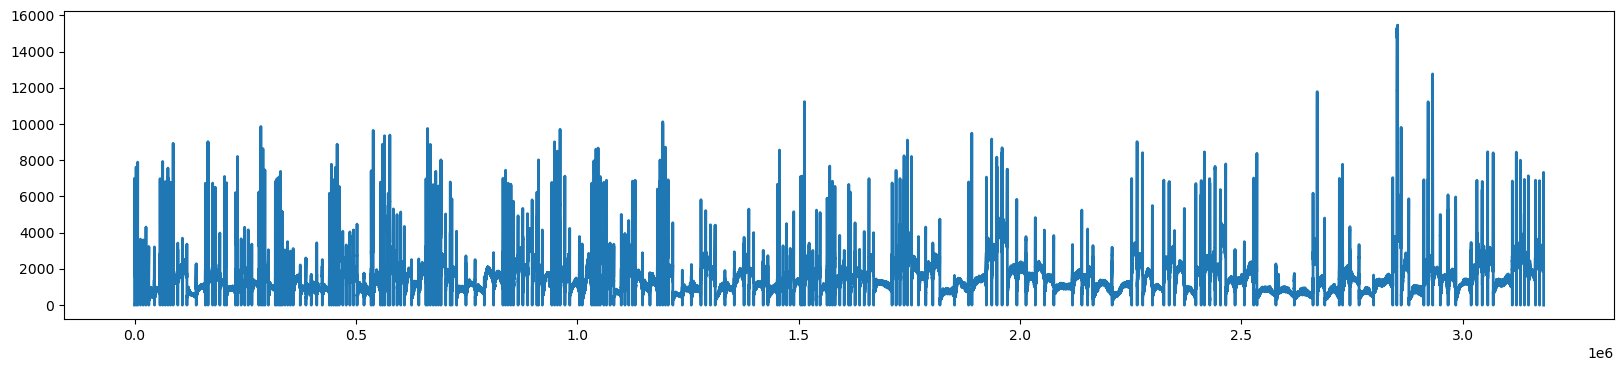

In [3]:
df.index.freq = 'TimeMS'
df.shape
df.columns
plt.figure(figsize=(20, 4))
plt.plot(df.avg_current, linewidth=2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


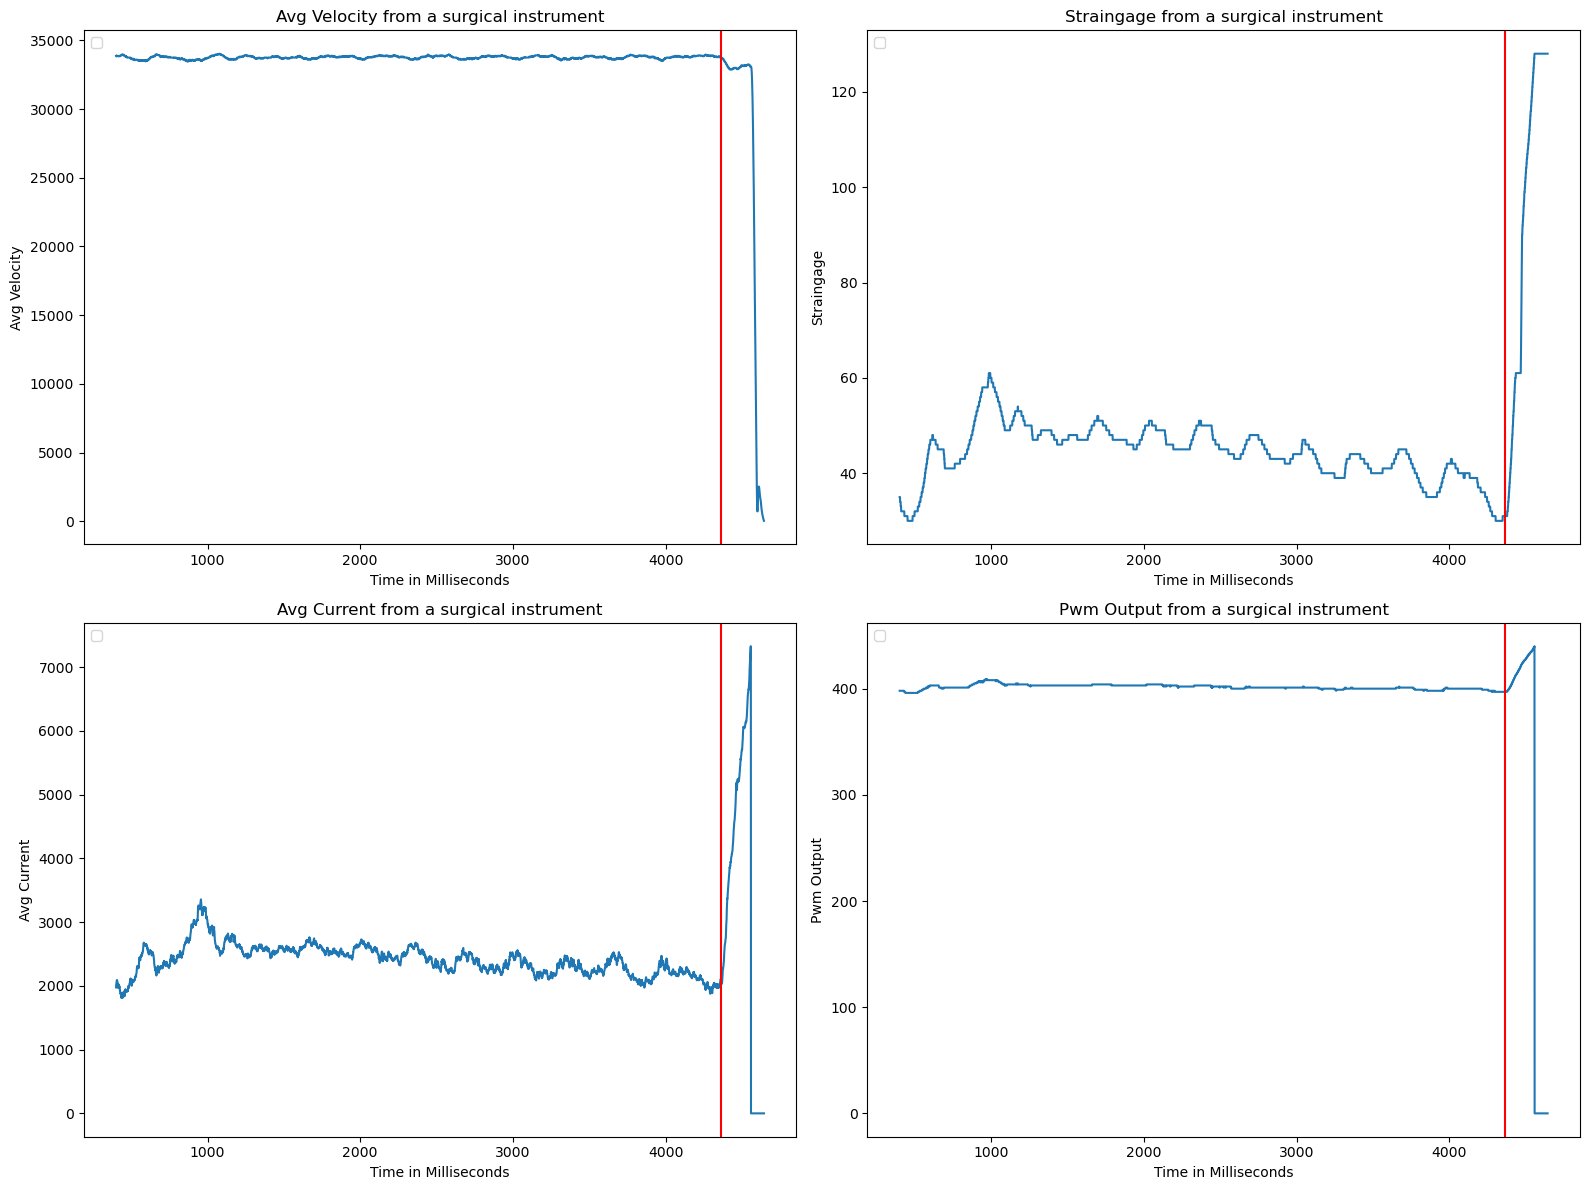

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame 'df'

cols = ['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type']

df = df[cols].rename({'True_Endstop_Time_ms':'Anomaly_At_Time_ms'}, axis=1)

measures = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output', 'Anomaly_At_Time_ms', 'id', 'TimeMS']

measures_1 = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output']

def plot_measure(df):
    e = np.unique(df['Anomaly_At_Time_ms'])[0]
    df = df[df.TimeMS > 400]

    plt.figure(figsize=(16, 12))
    
    for i, measure in enumerate(measures_1):  # Loop through the measures_1 list
        plt.subplot(2, 2, i + 1)
        plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
        plt.xlabel('Time in Milliseconds')
        plt.ylabel(measure.replace('_', ' ').title())
        plt.plot(df['TimeMS'], df[measure])
        plt.legend(loc="upper left")
        plt.axvline(e, color='r')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

df_97 = df[df["id"] == 97]

fig1 = plot_measure(df_97)


In [6]:
cols = ['id', 'TimeMS', 'Avg_Velocity', 'PWM_Output', 'SG_NoFilter', 'Setpoint', 'StrainGage', 'avg_current', 'current_filter', 'ticks', 'True_Endstop_Time_ms', 'Articulation', 'Tissue', 'Tissue_Thickness_inch', 'Firing_Type']

measures = ['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output', 'Anomaly_At_Time_ms', 'id', 'TimeMS']
measures_1=['avg_current']
for i in range(1,6):
  measure=measures[i-1]
  print(measure.title())
df=df[measures]

Avg_Velocity
Straingage
Avg_Current
Pwm_Output
Anomaly_At_Time_Ms


In [7]:
def plot_measure(df):
  e=np.unique(df['Anomaly_At_Time_ms'])[0]
  df=df[df.TimeMS > 400]
  #plt.plot('TimeMS','StrainGage',data=df)
  #plt.plot('TimeMS','Avg_Velocity',data=df)
  plt.figure(figsize=(16,12))
  for i in range(1,5):
    measure=measures_1[i-1]
    plt.subplot(2,2,i)
    plt.title(measure.title() + ' from a surgical instrument')
    # naming the x axis
    plt.xlabel('Time in Milliseconds')
    # naming the y axis
    plt.ylabel(measure.title())
    plt.plot('TimeMS',measure,data=df)
    #plt.plot('TimeMS','avg_current',data=df)
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')
  plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


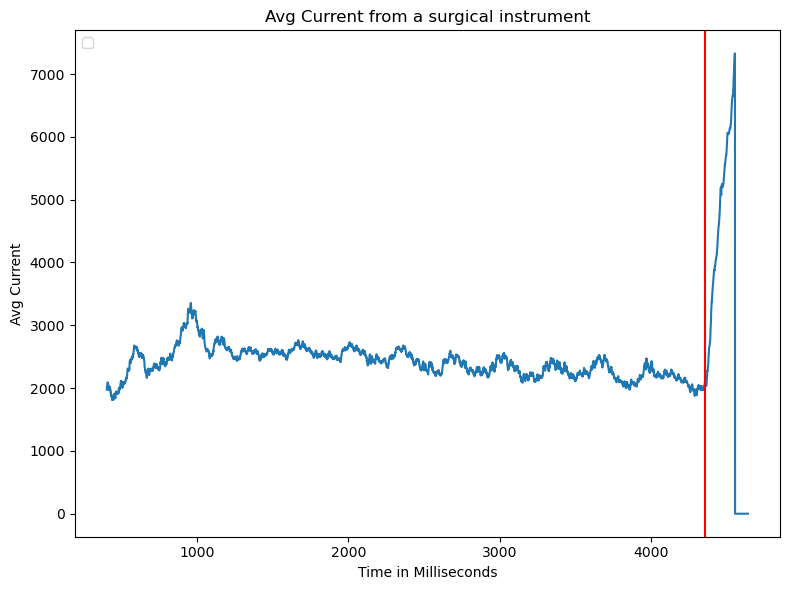

In [9]:

def plot_avg_current(df):
    e = np.unique(df['Anomaly_At_Time_ms'])[0]
    df = df[df.TimeMS > 400]

    plt.figure(figsize=(8, 6))
    
    measure = measures_1[0]  # Since there's only one measure, no need for a loop
    plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
    plt.xlabel('Time in Milliseconds')
    plt.ylabel(measure.replace('_', ' ').title())
    plt.plot(df['TimeMS'], df[measure])
    plt.legend(loc="upper left")
    plt.axvline(e, color='r')

    plt.tight_layout()  # Adjust spacing
    plt.savefig('plot4.eps', format='eps')
    plt.show()
measures_1=['avg_current']
df_97 = df[df["id"] == 97]

plot_avg_current(df_97)

In [10]:
df[['TimeMS','id']].groupby('id').count()

,TimeMS
id,
2,3764
3,3681
4,7436
5,7468
6,7376
...,...
366,12422
368,22102
370,12286


In [11]:
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming your DataFrame is named 'df'
# ... (previous code to define 'df' and other steps)

# Step 6: Pad sequences to ensure each 'id' has the same length as the maximum sequence length
max_seq_length = df[['TimeMS', 'id']].groupby('id').count().max().values[0]

# Create a dictionary to store sequences for each 'id' group
id_sequences = {}

# Group data by 'id' and store sequences in the dictionary
for id_group in df.groupby('id'):
    id_value, group_df = id_group
    sequence = group_df['TimeMS'].values
    id_sequences[id_value] = sequence

# Pad each sequence individually using the pad_sequences function for 'TimeMS'
padded_sequences = [pad_sequences([sequence], maxlen=max_seq_length, padding='pre', value=0)[0] for sequence in id_sequences.values()]

# Initialize a dictionary to store the padded sequences for each column
padded_data_dict = {}

# Pad each sequence individually using the pad_sequences function for other columns
for col in df.columns:
    if col not in ['TimeMS', 'id']:
        sequences = [group_df[col].values for _, group_df in df.groupby('id')]
        padded_sequences_col = [pad_sequences([sequence], maxlen=max_seq_length, padding='pre', value=0)[0] for sequence in sequences]
        padded_data_dict[col] = np.concatenate(padded_sequences_col, axis=0)

# Add 'Padded_TimeMS' column to the dictionary
padded_data_dict['Padded_TimeMS'] = np.concatenate(padded_sequences, axis=0)

# Add 'id' column to the dictionary
padded_data_dict['id'] = np.repeat(df['id'].unique(), max_seq_length)

# Create the final DataFrame with padded sequences for all columns
padded_df = pd.DataFrame(data=padded_data_dict)

# Now, 'padded_df' contains the data with padded sequences, and each 'id' has the same length as the maximum sequence length


In [12]:
padded_df[['Padded_TimeMS','id']].groupby('id').count()



,Padded_TimeMS
id,
2,43968
3,43968
4,43968
5,43968
6,43968
...,...
366,43968
368,43968
370,43968


In [13]:
import pandas as pd

# Assuming your dataset is already loaded into the DataFrame called "padded_df"
# If not, you can load it from your data source using pd.read_csv or any other method.

# Add a new column "Label" and initialize it with 0
padded_df['Label'] = 0

# Update "Label" to 1 for rows where "Padded_TimeMS" is greater than "Anomaly_At_Time_ms"
padded_df.loc[padded_df['Padded_TimeMS'] > padded_df['Anomaly_At_Time_ms'], 'Label'] = 1



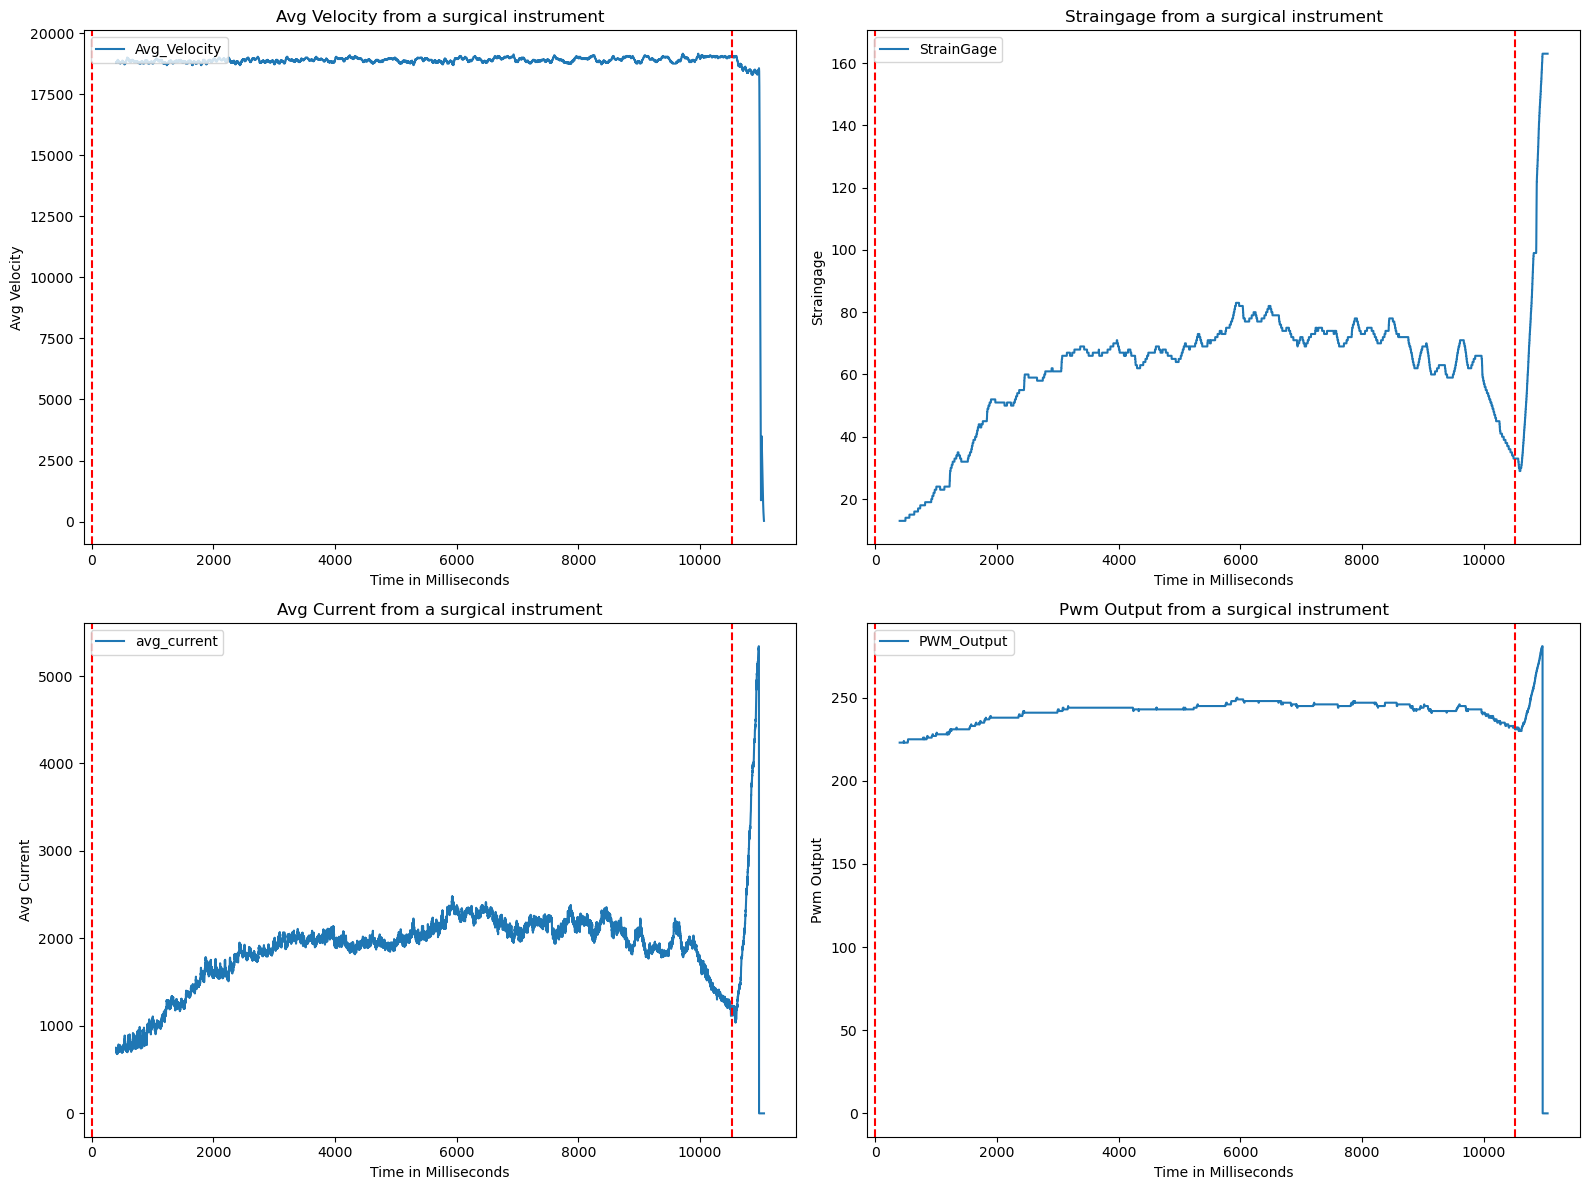

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_measure(padded_df):
    unique_times = np.unique(padded_df['Anomaly_At_Time_ms'])
    df = padded_df[padded_df['Padded_TimeMS'] > 400]

    plt.figure(figsize=(16, 12))

    for i, measure in enumerate(['Avg_Velocity', 'StrainGage', 'avg_current', 'PWM_Output']):
        plt.subplot(2, 2, i+1)
        plt.title(measure.replace('_', ' ').title() + ' from a surgical instrument')
        plt.xlabel('Time in Milliseconds')
        plt.ylabel(measure.replace('_', ' ').title())
        plt.plot('Padded_TimeMS', measure, data=df)

        # Add vertical lines for each unique Anomaly_At_Time_ms value
        for t in unique_times:
            plt.axvline(t, color='r', linestyle='--')

        plt.legend(loc="upper left")

    plt.tight_layout()
    plt.show()

# Assuming you have the 'padded_df' DataFrame
padded_df_97 = padded_df[padded_df["id"] == 97]
plot_measure(padded_df_97)

In [15]:
padded_df

,Avg_Velocity,StrainGage,avg_current,PWM_Output,Anomaly_At_Time_ms,Padded_TimeMS,id,Label
0,0,0,0,0,0,0,100,0
1,0,0,0,0,0,0,100,0
2,0,0,0,0,0,0,100,0
3,0,0,0,0,0,0,100,0
4,0,0,0,0,0,0,100,0
...,...,...,...,...,...,...,...,...
10991995,93,163,0,0,10522,11049,97,1
10991996,62,163,0,0,10522,11050,97,1
10991997,62,163,0,0,10522,11050,97,1
10991998,31,163,0,0,10522,11051,97,1


In [16]:
import numpy as np

# Separate features and labels for training and testing sets
#X = padded_df.drop(['Label', 'id', 'Anomaly_At_Time_ms', 'Padded_TimeMS'], axis=1)
X = padded_df[['PWM_Output']]
Y = padded_df[['Label']]

# Convert data to numpy arrays
X_np = X.values
Y_np = Y.values.ravel()

# Separate normal and faulty samples
X_normal = X_np[Y_np == 0]
X_faulty = X_np[Y_np == 1]
Y_normal = Y_np[Y_np == 0]
Y_faulty = Y_np[Y_np == 1]

In [17]:
# Determine the index to split between training and testing data
split_index = int(0.8 * len(X_normal))  # 80% for training, 20% for testing

# Split the data into training and testing sets
X_train = X_normal[:split_index]
X_test_1 = X_normal[split_index:]
Y_train = Y_normal[:split_index]
Y_test_1 = Y_normal[split_index:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test_1.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test_1.shape)

Shape of X_train: (8680403, 1)
Shape of X_test: (2170101, 1)
Shape of Y_train: (8680403,)
Shape of Y_test: (2170101,)


In [18]:
# Combine X_test_1 and X_faulty to create a new combined test set
X_test= np.concatenate((X_test_1, X_faulty), axis=0)

# Create corresponding labels for the combined test set
Y_test = np.concatenate((np.zeros(len(X_test_1)), np.ones(len(X_faulty))), axis=0)

print("Shape of X_test_combined:", X_test.shape)
print("Shape of Y_test_combined:", Y_test.shape)

Shape of X_test_combined: (2311597, 1)
Shape of Y_test_combined: (2311597,)


In [19]:
print(X_train.shape)
print(X_test.shape)

(8680403, 1)
(2311597, 1)


In [20]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(8680403, 1)
(2311597, 1)


In [26]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_inputs = 64
n_features = 1
# Create generator for target data (Y_normal)
#target_generator_test = TimeseriesGenerator(Y_faulty, Y_faulty, length=n_inputs, batch_size=1024)

generator_train = TimeseriesGenerator(X_train_scaled, Y_train, length=n_inputs, batch_size=1024)

for i in range(len(generator_train)):
    x_normal, y_normal= generator_train[i]
    print(f'\n {x_normal.flatten()} and {y_normal}')


 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0 0 0 ... 0 0 0]

 [-0.5247567 -0.5247567 -0.5247567 ... 

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_inputs = 64
n_features = 1
# Create generator for target data (Y_normal)
#target_generator_test = TimeseriesGenerator(Y_faulty, Y_faulty, length=n_inputs, batch_size=1024)

generator_test = TimeseriesGenerator(X_test_scaled, Y_test, length=n_inputs, batch_size=1024)

for i in range(len(generator_test)):
    x_faulty, y_faulty= generator_test[i]
    print(f'\n {x_faulty.flatten()} and {y_faulty}')


 [1.60033232 1.60033232 1.60033232 ... 1.5913657  1.5913657  1.5913657 ] and [0. 0. 0. ... 0. 0. 0.]

 [1.5913657  1.5913657  1.5913657  ... 1.58239908 1.58239908 1.58239908] and [0. 0. 0. ... 0. 0. 0.]

 [1.5913657 1.5913657 1.5913657 ... 1.5913657 1.5913657 1.5913657] and [0. 0. 0. ... 0. 0. 0.]

 [1.57343246 1.57343246 1.57343246 ... 1.58239908 1.58239908 1.58239908] and [0. 0. 0. ... 0. 0. 0.]

 [1.58239908 1.58239908 1.58239908 ... 1.56446584 1.56446584 1.56446584] and [0. 0. 0. ... 0. 0. 0.]

 [ 1.56446584  1.56446584  1.56446584 ... -0.5247567  -0.5247567
 -0.5247567 ] and [0. 0. 0. ... 0. 0. 0.]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0. 0. 0. ... 0. 0. 0.]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0. 0. 0. ... 0. 0. 0.]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0. 0. 0. ... 0. 0. 0.]

 [-0.5247567 -0.5247567 -0.5247567 ... -0.5247567 -0.5247567 -0.5247567] and [0. 

In [28]:
#Flattening the x
x_normal_r = x_normal.reshape((x_normal.shape[0], -1))
x_faulty_r = x_faulty.reshape((x_faulty.shape[0], -1))

In [29]:
x_normal_r.shape

(915, 64)

In [30]:
x_faulty_r.shape

(365, 64)

In [31]:
def get_generator(optimizer):
    generator = Sequential()
    generator.add(Dense(128, input_dim=64, kernel_initializer=initializers.glorot_normal(seed=42)))
    generator.add(Activation('tanh'))
    generator.add(Dense(256))
    generator.add(Activation('tanh'))
    generator.add(Dense(512))
    generator.add(Activation('tanh'))
    generator.add(Dense(64, activation='tanh'))  # Change the output shape to (None, 64)
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator


In [32]:
##### Defining the Discriminator network

def get_discriminator(optimizer):

    discriminator = Sequential()

    discriminator.add(Dense(256, input_dim=64, kernel_initializer=initializers.glorot_normal(seed=42)))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(128))
    discriminator.add(Activation('relu'))
    discriminator.add(Dropout(0.2))

    discriminator.add(Dense(1))
    discriminator.add(Activation('sigmoid'))

    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)

    return discriminator

In [33]:
def get_gan_network(discriminator, generator, optimizer, input_dim=64):
    discriminator.trainable = False
    gan_input = Input(shape=(input_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [34]:
learning_rate = 0.00001
batch_size = 32
epochs = 64
adam = tf.keras.optimizers.legacy.Adam(learning_rate = learning_rate,beta_1 = 0.5)

In [35]:
input_dim = 64

generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam, input_dim=input_dim)


In [36]:
#Calculating the number of batches based on the batch size
from tqdm import tqdm
batch_count = x_normal_r.shape[0] // batch_size
pbar = tqdm(total=epochs * batch_count)
gan_loss = []
discriminator_loss = []

#Inititalizing the network
generator = get_generator(adam)
discriminator = get_discriminator(adam)
gan = get_gan_network(discriminator, generator, adam,input_dim=64)


for epoch in range(epochs):
    for index in range(batch_count):
        pbar.update(1)
        # Creating a random set of input noise and images
        noise = np.random.normal(0, 1, size=[batch_size,64])

        # Generate fake samples
        generated_images = generator.predict_on_batch(noise)

        #Obtain a batch of normal network packets
        image_batch = x_normal_r[index * batch_size: (index + 1) * batch_size]

        X = np.vstack((generated_images,image_batch))
        y_dis = np.ones(2*batch_size)
        y_dis[:batch_size] = 0

        # Train discriminator
        discriminator.trainable = True
        d_loss= discriminator.train_on_batch(X, y_dis)

        # Train generator
        noise = np.random.uniform(0, 1, size=[batch_size, 64])
        y_gen = np.ones(batch_size)
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gen)

        #Record the losses
        discriminator_loss.append(d_loss)
        gan_loss.append(g_loss)

    print("Epoch %d Batch %d/%d [D loss: %f] [G loss:%f]" % (epoch,index,batch_count, d_loss, g_loss))

  0%|          | 1/1792 [00:00<15:48,  1.89it/s]C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
  2%|▏         | 44/1792 [00:03<01:00, 29.09it/s]

Epoch 0 Batch 27/28 [D loss: 0.603428] [G loss:0.659783]


  4%|▍         | 68/1792 [00:04<00:33, 50.98it/s]

Epoch 1 Batch 27/28 [D loss: 0.591779] [G loss:0.605999]


  5%|▌         | 95/1792 [00:04<00:24, 68.87it/s]

Epoch 2 Batch 27/28 [D loss: 0.526652] [G loss:0.542137]


  7%|▋         | 122/1792 [00:04<00:21, 76.96it/s]

Epoch 3 Batch 27/28 [D loss: 0.500730] [G loss:0.488539]


  8%|▊         | 149/1792 [00:05<00:20, 78.36it/s]

Epoch 4 Batch 27/28 [D loss: 0.483266] [G loss:0.419866]


 10%|█         | 183/1792 [00:05<00:20, 79.12it/s]

Epoch 5 Batch 27/28 [D loss: 0.448369] [G loss:0.398098]


 12%|█▏        | 209/1792 [00:05<00:19, 79.99it/s]

Epoch 6 Batch 27/28 [D loss: 0.436032] [G loss:0.357611]


 13%|█▎        | 235/1792 [00:06<00:19, 79.94it/s]

Epoch 7 Batch 27/28 [D loss: 0.429377] [G loss:0.356576]


 15%|█▍        | 262/1792 [00:06<00:19, 80.18it/s]

Epoch 8 Batch 27/28 [D loss: 0.444038] [G loss:0.296026]


 16%|█▌        | 289/1792 [00:06<00:18, 80.57it/s]

Epoch 9 Batch 27/28 [D loss: 0.399482] [G loss:0.362358]


 18%|█▊        | 324/1792 [00:07<00:19, 77.14it/s]

Epoch 10 Batch 27/28 [D loss: 0.418194] [G loss:0.311806]


 19%|█▉        | 348/1792 [00:07<00:19, 75.33it/s]

Epoch 11 Batch 27/28 [D loss: 0.360574] [G loss:0.283191]


 21%|██        | 380/1792 [00:08<00:18, 76.39it/s]

Epoch 12 Batch 27/28 [D loss: 0.356994] [G loss:0.318209]


 23%|██▎       | 404/1792 [00:08<00:18, 75.47it/s]

Epoch 13 Batch 27/28 [D loss: 0.343349] [G loss:0.319899]


 24%|██▍       | 430/1792 [00:08<00:17, 79.36it/s]

Epoch 14 Batch 27/28 [D loss: 0.312101] [G loss:0.286329]


 26%|██▌       | 457/1792 [00:09<00:16, 81.67it/s]

Epoch 15 Batch 27/28 [D loss: 0.285078] [G loss:0.295266]


 28%|██▊       | 493/1792 [00:09<00:15, 81.68it/s]

Epoch 16 Batch 27/28 [D loss: 0.306333] [G loss:0.269000]


 29%|██▉       | 520/1792 [00:09<00:15, 80.91it/s]

Epoch 17 Batch 27/28 [D loss: 0.376330] [G loss:0.265336]


 31%|███       | 547/1792 [00:10<00:15, 82.39it/s]

Epoch 18 Batch 27/28 [D loss: 0.296008] [G loss:0.230619]


 32%|███▏      | 574/1792 [00:10<00:14, 83.13it/s]

Epoch 19 Batch 27/28 [D loss: 0.313916] [G loss:0.210282]


 34%|███▎      | 601/1792 [00:10<00:14, 83.27it/s]

Epoch 20 Batch 27/28 [D loss: 0.286986] [G loss:0.183246]


 35%|███▌      | 628/1792 [00:11<00:13, 83.70it/s]

Epoch 21 Batch 27/28 [D loss: 0.247958] [G loss:0.223605]


 37%|███▋      | 655/1792 [00:11<00:13, 82.85it/s]

Epoch 22 Batch 27/28 [D loss: 0.288025] [G loss:0.215282]


 38%|███▊      | 682/1792 [00:11<00:13, 81.42it/s]

Epoch 23 Batch 27/28 [D loss: 0.230404] [G loss:0.182027]


 40%|███▉      | 709/1792 [00:12<00:13, 80.32it/s]

Epoch 24 Batch 27/28 [D loss: 0.246262] [G loss:0.180728]


 42%|████▏     | 745/1792 [00:12<00:12, 80.97it/s]

Epoch 25 Batch 27/28 [D loss: 0.207950] [G loss:0.200770]


 43%|████▎     | 772/1792 [00:12<00:12, 81.14it/s]

Epoch 26 Batch 27/28 [D loss: 0.275406] [G loss:0.212411]


 45%|████▍     | 799/1792 [00:13<00:12, 80.82it/s]

Epoch 27 Batch 27/28 [D loss: 0.219457] [G loss:0.214075]


 46%|████▌     | 826/1792 [00:13<00:12, 78.66it/s]

Epoch 28 Batch 27/28 [D loss: 0.233129] [G loss:0.218902]


 47%|████▋     | 851/1792 [00:13<00:11, 79.21it/s]

Epoch 29 Batch 27/28 [D loss: 0.196096] [G loss:0.209973]


 49%|████▉     | 876/1792 [00:14<00:11, 79.56it/s]

Epoch 30 Batch 27/28 [D loss: 0.253126] [G loss:0.206222]


 51%|█████     | 912/1792 [00:14<00:10, 80.22it/s]

Epoch 31 Batch 27/28 [D loss: 0.158999] [G loss:0.205433]


 52%|█████▏    | 939/1792 [00:15<00:10, 80.73it/s]

Epoch 32 Batch 27/28 [D loss: 0.219617] [G loss:0.183900]


 54%|█████▍    | 966/1792 [00:15<00:10, 80.67it/s]

Epoch 33 Batch 27/28 [D loss: 0.185191] [G loss:0.167315]


 55%|█████▌    | 993/1792 [00:15<00:09, 80.29it/s]

Epoch 34 Batch 27/28 [D loss: 0.169541] [G loss:0.150764]


 57%|█████▋    | 1020/1792 [00:16<00:09, 80.57it/s]

Epoch 35 Batch 27/28 [D loss: 0.164226] [G loss:0.266249]


 58%|█████▊    | 1047/1792 [00:16<00:09, 81.00it/s]

Epoch 36 Batch 27/28 [D loss: 0.221451] [G loss:0.156082]


 60%|█████▉    | 1074/1792 [00:16<00:08, 81.04it/s]

Epoch 37 Batch 27/28 [D loss: 0.127821] [G loss:0.291049]


 61%|██████▏   | 1101/1792 [00:17<00:08, 81.31it/s]

Epoch 38 Batch 27/28 [D loss: 0.117851] [G loss:0.219961]


 63%|██████▎   | 1137/1792 [00:17<00:08, 81.03it/s]

Epoch 39 Batch 27/28 [D loss: 0.150353] [G loss:0.230951]


 64%|██████▍   | 1155/1792 [00:17<00:07, 80.37it/s]

Epoch 40 Batch 27/28 [D loss: 0.165779] [G loss:0.183668]


 66%|██████▋   | 1191/1792 [00:18<00:07, 81.18it/s]

Epoch 41 Batch 27/28 [D loss: 0.161804] [G loss:0.216135]


 68%|██████▊   | 1218/1792 [00:18<00:07, 80.84it/s]

Epoch 42 Batch 27/28 [D loss: 0.125024] [G loss:0.185597]


 69%|██████▉   | 1245/1792 [00:18<00:06, 80.65it/s]

Epoch 43 Batch 27/28 [D loss: 0.128600] [G loss:0.163420]


 71%|███████   | 1272/1792 [00:19<00:06, 80.89it/s]

Epoch 44 Batch 27/28 [D loss: 0.188139] [G loss:0.199147]


 73%|███████▎  | 1306/1792 [00:19<00:06, 79.66it/s]

Epoch 45 Batch 27/28 [D loss: 0.113963] [G loss:0.194657]


 74%|███████▍  | 1330/1792 [00:19<00:05, 79.51it/s]

Epoch 46 Batch 27/28 [D loss: 0.231878] [G loss:0.199601]


 76%|███████▌  | 1354/1792 [00:20<00:05, 78.09it/s]

Epoch 47 Batch 27/28 [D loss: 0.121084] [G loss:0.169515]


 77%|███████▋  | 1386/1792 [00:20<00:05, 78.99it/s]

Epoch 48 Batch 27/28 [D loss: 0.141667] [G loss:0.202531]


 79%|███████▊  | 1411/1792 [00:20<00:04, 79.27it/s]

Epoch 49 Batch 27/28 [D loss: 0.153110] [G loss:0.315466]


 80%|████████  | 1438/1792 [00:21<00:04, 80.12it/s]

Epoch 50 Batch 27/28 [D loss: 0.133370] [G loss:0.210683]


 82%|████████▏ | 1465/1792 [00:21<00:04, 80.60it/s]

Epoch 51 Batch 27/28 [D loss: 0.094017] [G loss:0.143304]


 84%|████████▍ | 1501/1792 [00:22<00:03, 81.02it/s]

Epoch 52 Batch 27/28 [D loss: 0.146256] [G loss:0.235560]


 85%|████████▌ | 1528/1792 [00:22<00:03, 80.25it/s]

Epoch 53 Batch 27/28 [D loss: 0.132074] [G loss:0.157782]


 87%|████████▋ | 1555/1792 [00:22<00:02, 80.65it/s]

Epoch 54 Batch 27/28 [D loss: 0.272466] [G loss:0.187167]


 88%|████████▊ | 1582/1792 [00:23<00:02, 80.78it/s]

Epoch 55 Batch 27/28 [D loss: 0.147846] [G loss:0.209069]


 90%|████████▉ | 1608/1792 [00:23<00:02, 78.68it/s]

Epoch 56 Batch 27/28 [D loss: 0.079616] [G loss:0.187382]


 91%|█████████ | 1632/1792 [00:23<00:02, 74.45it/s]

Epoch 57 Batch 27/28 [D loss: 0.075717] [G loss:0.245981]


 93%|█████████▎| 1665/1792 [00:24<00:01, 77.74it/s]

Epoch 58 Batch 27/28 [D loss: 0.123043] [G loss:0.258019]


 94%|█████████▍| 1690/1792 [00:24<00:01, 77.89it/s]

Epoch 59 Batch 27/28 [D loss: 0.040192] [G loss:0.201138]


 96%|█████████▌| 1717/1792 [00:24<00:00, 82.11it/s]

Epoch 60 Batch 27/28 [D loss: 0.104656] [G loss:0.171423]


 97%|█████████▋| 1744/1792 [00:25<00:00, 82.83it/s]

Epoch 61 Batch 27/28 [D loss: 0.145722] [G loss:0.187102]


 99%|█████████▉| 1780/1792 [00:25<00:00, 82.40it/s]

Epoch 62 Batch 27/28 [D loss: 0.099540] [G loss:0.152764]


100%|█████████▉| 1789/1792 [00:25<00:00, 81.85it/s]

Epoch 63 Batch 27/28 [D loss: 0.136566] [G loss:0.177282]


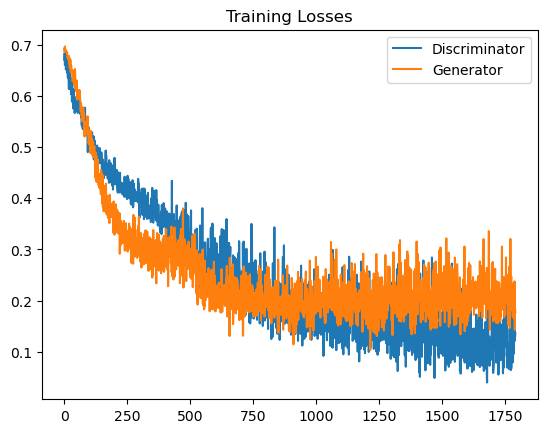

In [37]:
fig, ax = plt.subplots()
plt.plot(discriminator_loss, label='Discriminator')
plt.plot(gan_loss, label='Generator')
plt.title("Training Losses")
plt.legend()

In [38]:
# Predictions on the train set

nr_batches_train = np.ceil(x_normal_r.shape[0] // batch_size).astype(np.int32)

results_normal =[]

for t in range(nr_batches_train +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = x_normal_r[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results_normal = np.append(results_normal, tmp_rslt)

In [39]:
# Predictions on the test set

nr_batches_test = np.ceil(x_faulty_r.shape[0] // batch_size).astype(np.int32)

results =[]

for t in range(nr_batches_test +1):
        ran_from = t * batch_size
        ran_to = (t + 1) * batch_size
        image_batch = x_faulty_r[ran_from:ran_to]
        tmp_rslt = discriminator.predict(x=image_batch,batch_size=32,verbose=0)
        results = np.append(results, tmp_rslt)

In [40]:
pd.options.display.float_format = '{:20,.7f}'.format
results_df = pd.concat([pd.DataFrame(results),pd.DataFrame(y_faulty)], axis=1)
results_df.columns = ['results','y_faulty']
print ('Mean score for normal signals :', results_df.loc[results_df['y_faulty'] == 0, 'results'].mean() )
print ('Mean score for anomalous signals :', results_df.loc[results_df['y_faulty'] == 1, 'results'].mean())

Mean score for normal signals : nan
Mean score for anomalous signals : 0.5516668166988337


In [41]:
def get_error_term(v1, v2, _rmse=True):
    if _rmse:
        return np.sqrt(np.mean((v1 - v2) ** 2, axis=1))
    #return MAE
    return np.mean(abs(v1 - v2), axis=1)

In [42]:
y_faulty.shape

(365,)

In [43]:
results.shape

(365,)

In [44]:
import numpy as np

mae_vector = np.abs(y_faulty - results)
print("MAE Vector:", mae_vector)

MAE Vector: [1.73646212e-03 1.73050165e-03 1.73103809e-03 1.71971321e-03
 1.70898438e-03 1.69849396e-03 1.69283152e-03 1.68436766e-03
 1.68257952e-03 1.68013573e-03 1.66964531e-03 1.66738033e-03
 1.65367126e-03 1.64568424e-03 1.64866447e-03 1.63763762e-03
 1.63072348e-03 1.62523985e-03 1.61403418e-03 1.60413980e-03
 1.60020590e-03 1.59448385e-03 1.58882141e-03 1.59031153e-03
 1.58011913e-03 1.57326460e-03 1.57815218e-03 1.56801939e-03
 1.56056881e-03 1.55663490e-03 1.54793262e-03 1.54393911e-03
 1.53839588e-03 1.53231621e-03 1.52647495e-03 1.52403116e-03
 1.51705742e-03 1.50996447e-03 1.51026249e-03 1.50954723e-03
 1.50984526e-03 1.50209665e-03 1.49238110e-03 1.49071217e-03
 1.48534775e-03 1.48081779e-03 1.47944689e-03 1.47068501e-03
 1.46269798e-03 1.45924091e-03 1.45834684e-03 1.45834684e-03
 1.45846605e-03 1.45697594e-03 1.45256519e-03 1.44511461e-03
 1.43724680e-03 1.43390894e-03 1.42866373e-03 1.42091513e-03
 1.41930580e-03 1.41686201e-03 1.41197443e-03 1.40970945e-03
 1.40726566e

In [45]:
print(np.mean(mae_vector))
print(np.max(mae_vector))
print(np.min(mae_vector))

0.4483331833011664
0.9999999763135126
0.0009425878524780273


In [54]:
error_thresh=0.001

anomalies = (mae_vector > error_thresh)

np.count_nonzero(anomalies) / len(anomalies)

0.9506849315068493

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_faulty, anomalies))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.95      0.97       365

    accuracy                           0.95       365
   macro avg       0.50      0.48      0.49       365
weighted avg       1.00      0.95      0.97       365



C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
The PostScript backend does not support transpare

              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
     Anomaly       1.00      0.95      0.97       365

    accuracy                           0.95       365
   macro avg       0.50      0.48      0.49       365
weighted avg       1.00      0.95      0.97       365



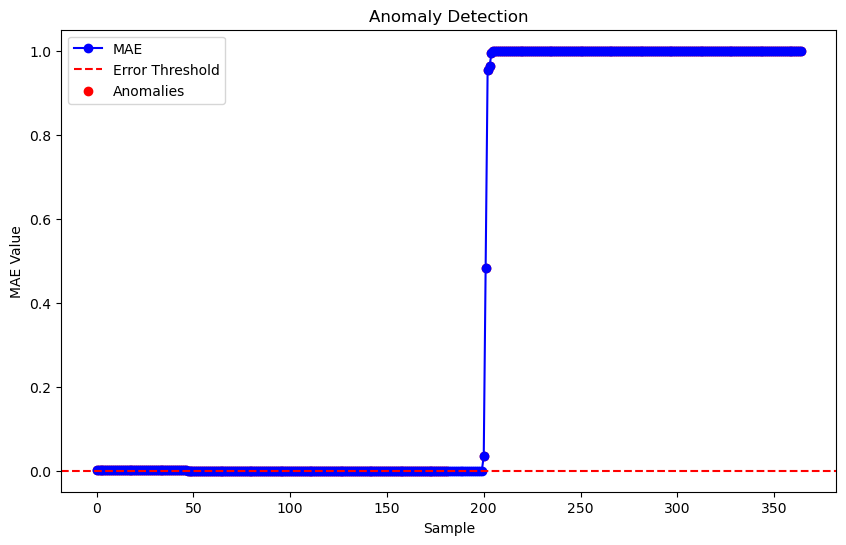

In [56]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mae_vector, 'bo-', label='MAE')
plt.axhline(y=error_thresh, color='r', linestyle='--', label='Error Threshold')
plt.scatter(np.where(anomalies), mae_vector[anomalies], color='red', marker='o', label='Anomalies')
plt.xlabel('Sample')
plt.ylabel('MAE Value')
plt.title('Anomaly Detection')
plt.legend()

# Classification Report
print(classification_report(y_faulty, anomalies, target_names=['Normal', 'Anomaly']))

plt.savefig('plot4.eps', format='eps')
plt.show()




<Figure size 640x480 with 0 Axes>

C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAIL\anaconda3\envs\fault\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         0
     Anomaly       1.00      0.94      0.97       365

    accuracy                           0.94       365
   macro avg       0.50      0.47      0.49       365
weighted avg       1.00      0.94      0.97       365



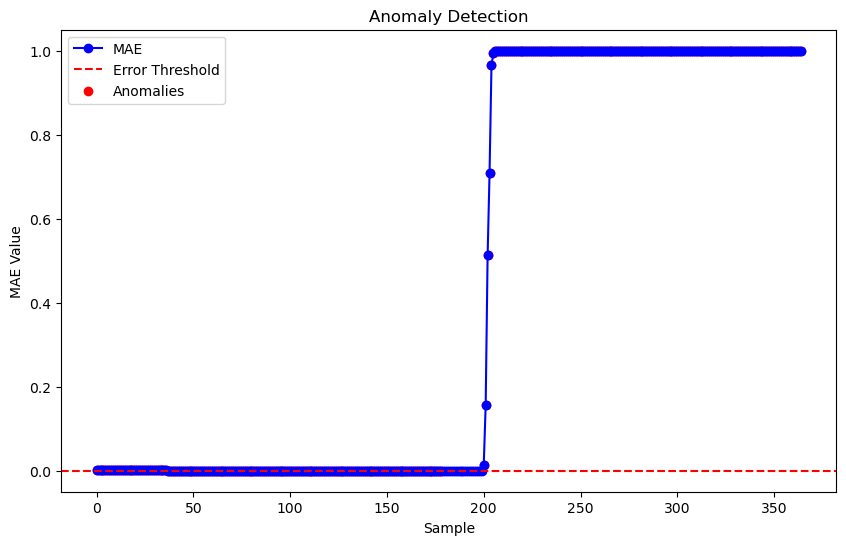

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mae_vector, 'bo-', label='MAE')
plt.axhline(y=error_thresh, color='r', linestyle='--', label='Error Threshold')
plt.scatter(np.where(anomalies), mae_vector[anomalies], color='red', marker='o', label='Anomalies')
plt.xlabel('Sample')
plt.ylabel('MAE Value')
plt.title('Anomaly Detection')
plt.legend()

# Classification Report
print(classification_report(y_faulty, anomalies, target_names=['Normal', 'Anomaly']))

plt.show()


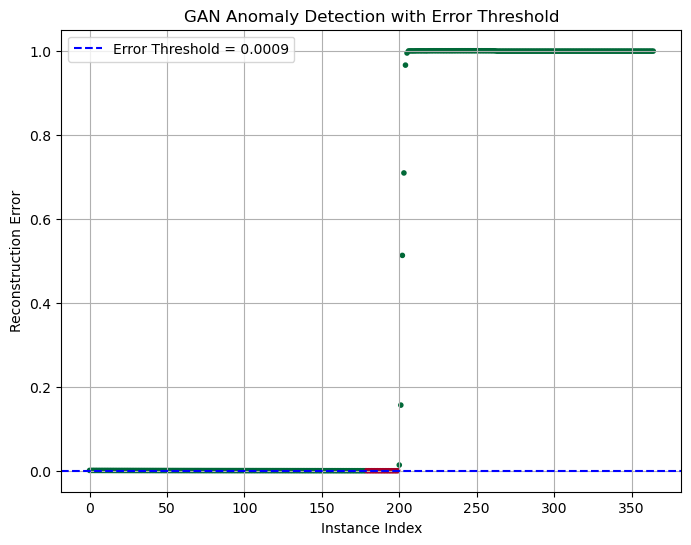

<Figure size 640x480 with 0 Axes>

In [408]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(anomalies)), mae_vector, c=anomalies, cmap='RdYlGn', marker='.')
plt.axhline(y=error_thresh, color='b', linestyle='--', label=f'Error Threshold = {error_thresh}')
plt.xlabel('Instance Index')
plt.ylabel('Reconstruction Error')
plt.title('GAN Anomaly Detection with Error Threshold')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('plot2.eps', format='eps')

In [265]:
plt.tight_layout()
plt.show()
plt.savefig('plot.eps', format='eps')
plt.close()


C:\Users\SAIL\AppData\Local\Temp\ipykernel_6400\187632308.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
